# Midterm Skill Exam
---

**Name:** Jann Moises Nyll B. De los Reyes

**Section:** CPE22S3

**Date:** March 11, 2024

**Submitted to:** Engr. Roman M. Richard

---


In this activity, you are expected to demonstrate skills learned from concluded modules. Specifically:

* Analyze data using tools such as numpy and pandas for data wrangling tasks;
* Visualize data using pandas and seaborn;
* Perform exploratory data analysis on a complex dataset.

Resources:

* Jupyter Lab / Notebook
* Dataset: [https://archive-beta.ics.uci.edu/dataset/20/census+incomeLinks](https://archive.ics.uci.edu/dataset/20/census+income)

Submission Requirements:

* Perform data wrangling on the given dataset.
* Visualize the given dataset.
* Submit pdf of exploratory data analysis.
* Submit pdf of EDA presentation. Sample: [https://aseandse.org/asean-dse-storyboard/](https://aseandse.org/asean-dse-storyboard/)




## **About Data**




# Setup
---
We need to install the following package to install the dataset using  API

In [113]:
pip install ucimlrepo

Import the dataset into your code

In [114]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

By importing the dataframes, we can access the metadata were we will be able to know the information  such as missing values

## Importing the necessary package to be used on Data Wrangling


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Accessing  each dataframe columns


In [116]:
#Accessing  the X dataframe
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [117]:
#Accessing the y dataframe
y.columns

Index(['income'], dtype='object')

## Merging the two separate dataframe

We will use the .concat() to merge the X and y dataframe with an axis = 1 to make a new dataframe called ```census_df``` with a dataset containing X and y columns.

In [ ]:
census_df = pd.concat([X,y],axis = 1)
census_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Identifying the Dataframe Characteristics
---

It is important for us to know  the characteristics of our dataframe. By knowing the size, missing values and  etc. We can use `shape()`, `describe()`, and `info` to know more information about our dataframe. We can make a list of all changes we need before we proceed in data cleaning.

In [ ]:
# Identify the size of our dataframe
print('Rows:{} Columns:{}'.format(census_df.shape[0],census_df.shape[1]))

Rows:48842 Columns:15


In [ ]:
#Statistical Summary of  our dataframe
census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


On our first exploration on our data we found that we have  missing data in  **workclass**, **occupation**, and **native-country** column. We need to explore more about the data entered in each columns. We will use  the` unique()` to extract unique data entries.

In [ ]:
# to access workclass column entries
census_df['workclass'].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [ ]:
# to accesse education column entries
census_df['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
# to access marital-status column entries
census_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
# to access occupation column entries
census_df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [ ]:
# to access relationship column entries
census_df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [ ]:
# to access race column entries
census_df['race'].unique()


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [ ]:
# to access native country column entries
census_df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [ ]:
census_df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

* As we can see  in the above summary of our dataframe, we have NaN values as  `nan` and unknown values denoted as `?` in `workclass`, `ocupation`, `native-country` column.


* Meanwhile, `education` column  has a  a data entries of  *`9th`*, *`10th`*, *`11th`*, and *`12th`* grade  is part of a `Highschool undergrad` but it was mentioned separately.We need to also make an object called `Elementary` for `1st-4th`, `5th-6th` and `7th-8th` since we need a formality in the dataset.


* In workclass, we can simple  join the `self-emp-not-inc` and `self-emp-income` under  `self employed` category. We can also  join `local-gov`, `State-gov`, `Federal-gov` under  government employees.

* We can also  simplfy the category of marital status by making  married-civ-spouse, married-spous-absent, married-AF-spouse into `married`. We can also  simplfy the  Divorced, separated  into  `separated ` category.

* Lastly the income can be simplify by joining `>50k` where it includes `>50k` and `50k.` and `<=50k` from `<=50k` and `<=50k.`

*Note that simplifying some category would make our analysis substandard since some profitability is different from one another.*



---

## Missing Values

The following procedures allow us to change the missing and unknown  values in our dataframe. First we need to know the number of  missing and unknown values of our dataset

In [ ]:
census_df.isnull().sum()  #Count the missing value of each columns using .isnull()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [ ]:
census_df.isin(['?']).sum() #Count the unknown value (denoted as '?' ) in each columns

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## Dealing with missing values

In our data, we found several missing value in our dataset.

In [ ]:
census_df[census_df['workclass'].isna()]
# We can change  the  columns to the above code to see  the nan values


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
32596,65,NaN,191846,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K.
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.


We use  the `.apply()` to fill the nan values with  the most common class in the dataset using `.fillna()`. We can do this by taking the index of the most common class which can be determined by using `value_counts()` method.


In [ ]:
# filling with most common class
census_df = census_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
#Check the following by locating some nan value in the previous code.
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
census_df.isnull().sum()  #To check if we have any missing value of each columns using .isnull()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Dealing with unknown value

We can use .replace() to change the  ? with a class of `unknown`

In [118]:
census_df.loc[census_df['native-country'] == '?']
# We can change  the  columns to the above code to see  the missing values

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours-per-week,native-country,income


In [119]:
unknown_cols = ['native-country','occupation','workclass']
# Replace ? with Unknown
for col in unknown_cols:
    census_df.loc[census_df[col] == '?', col] = 'unknown'


In [120]:
# Check if ? is present
for col in unknown_cols:
    print(f"? in {col}: {census_df[(census_df[col] == '?')].any().sum()}")

? in native-country: 0
? in occupation: 0
? in workclass: 0


In [ ]:
for col in unknown_cols:
    print(f"? in {col}: {census_df[(census_df[col] == '?')].any().sum()}")

? in native-country: 0
? in occupation: 0
? in workclass: 0


We can check the following columnn if theres any '?' value in the dataset.

In [121]:
census_df.isin(['?']).sum() #Count the unknown value (denoted as '?' ) in each columns

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [122]:
#rename column
census_df = census_df.rename(columns={'marital-status': 'marital_status'})
census_df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours-per-week,native-country,income
0,39,govt_employee,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,self_employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,HS-grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50k
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50k
48839,38,Private,374983,Bachelors,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
48840,44,Private,83891,Bachelors,13,Separated,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


# Correcting and Simplfying data

Now that we already clean and fill up the missing value we can now normalize the data by simplifying some class in the following columns (`education`,`marital-status`,`workclass` and `income`).

### **Education columns**



In [ ]:
#simplify the class of each columns
HS_grad = ['HS-grad','11th','9th','12th','10th']
elementary = ['1st-4th','5th-6th','7th-8th']
associate = ['Assoc-acdm','Assoc-voc']
bachelor = ['Bachelors','Some-college']
post_grad = ['Prof-school','Masters','Doctorate']
#replace elements in  list
census_df['education'].replace(to_replace = HS_grad,value = 'HS-grad',inplace =True)
census_df['education'].replace(to_replace = elementary,value = 'Elementary',inplace =True)
census_df['education'].replace(to_replace = associate,value = 'Associate',inplace =True)
census_df['education'].replace(to_replace = bachelor,value = 'Bachelors',inplace =True)
census_df['education'].replace(to_replace = post_grad,value = 'Post-Graduate',inplace =True)
#count the number of class in education  columns
census_df['education'].value_counts()

education
HS-grad          20398
Bachelors        18903
Post-Graduate     4085
Associate         3662
Elementary        1711
Preschool           83
Name: count, dtype: int64

In [ ]:
census_df['education'].unique()

array(['Bachelors', 'HS-grad', 'Post-Graduate', 'Associate', 'Elementary',
       'Preschool'], dtype=object)

### **Marital status columns**

In [ ]:
married = ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
separated = ['Divorced','Separated']

#replace elements in list
census_df['marital_status'].replace(to_replace = married, value = 'Married',inplace =True)
census_df['marital_status'].replace(to_replace = separated,value = 'Separated',inplace =True)

#count the number of class in marital-status  columns
census_df['marital_status'].value_counts()

marital_status
Married          23044
Never-married    16117
Separated         8163
Widowed           1518
Name: count, dtype: int64

In [ ]:
census_df['marital_status'].unique()

array(['Never-married', 'Married', 'Separated', 'Widowed'], dtype=object)

### **Workclass**



In [ ]:
self_employees = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['State-gov','Federal-gov','Local-gov']

#replace elements in list
census_df['workclass'].replace(to_replace = self_employees, value = 'self_employed',inplace =True)
census_df['workclass'].replace(to_replace = govt_employees,value = 'govt_employee',inplace =True)

#count the number of class in marital-status  columns
census_df['workclass'].value_counts()

workclass
Private          34869
govt_employee     6549
self_employed     5557
unknown           1836
Without-pay         21
Never-worked        10
Name: count, dtype: int64

In [ ]:
census_df['workclass'].unique()

array(['govt_employee', 'self_employed', 'Private', 'unknown',
       'Without-pay', 'Never-worked'], dtype=object)

### **Income**

In [ ]:
less50 = ['<=50K','<=50K.']
greater50 = ['>50K','>50K.']

#replace elements in list
census_df['income'].replace(to_replace = less50, value = '<=50k',inplace =True)
census_df['income'].replace(to_replace = greater50,value = '>50k',inplace =True)

#count the number of class in marital-status  columns
census_df['income'].value_counts()

income
<=50k    37155
>50k     11687
Name: count, dtype: int64

In [ ]:
census_df['income'].unique()

array(['<=50k', '>50k'], dtype=object)

## Data visualization

<ipython-input-93-8f9664b7e8e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_df.age)


<Axes: xlabel='age', ylabel='Density'>

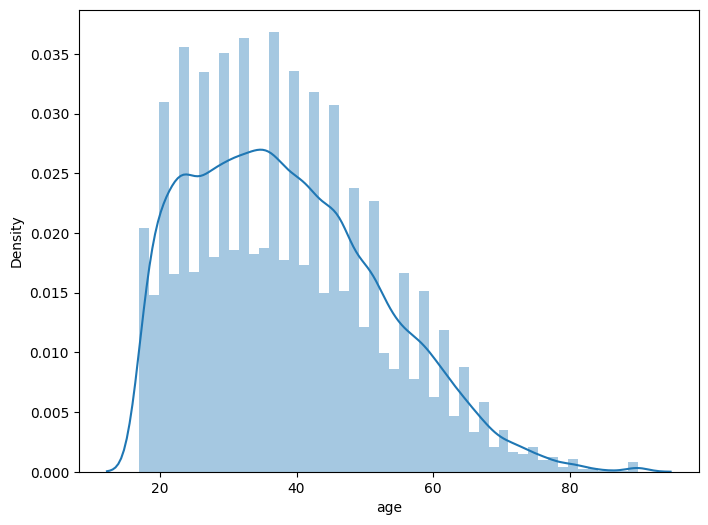

In [ ]:
#Distribution of  Age in  Income  Census
sns.distplot(census_df.age)

In [ ]:
census_df['workclass'].value_counts()

workclass
Private          34869
govt_employee     6549
self_employed     5557
unknown           1836
Without-pay         21
Never-worked        10
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='workclass'>

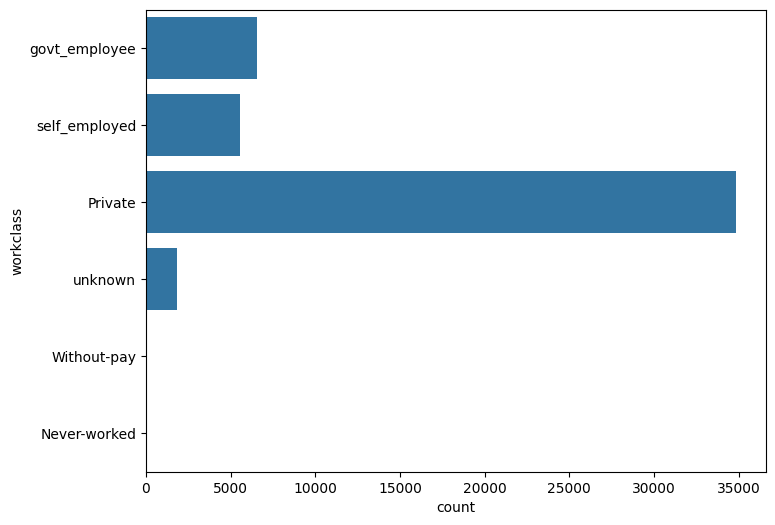

In [ ]:
sns.countplot(census_df.workclass)

In [ ]:
census_df['education'].value_counts()

education
HS-grad          20398
Bachelors        18903
Post-Graduate     4085
Associate         3662
Elementary        1711
Preschool           83
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='education'>

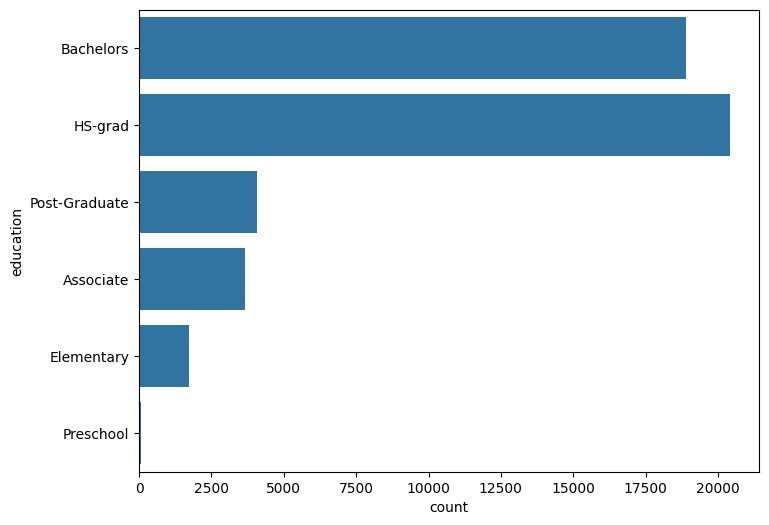

In [ ]:
sns.countplot(census_df.education)

<Axes: xlabel='count', ylabel='marital_status'>

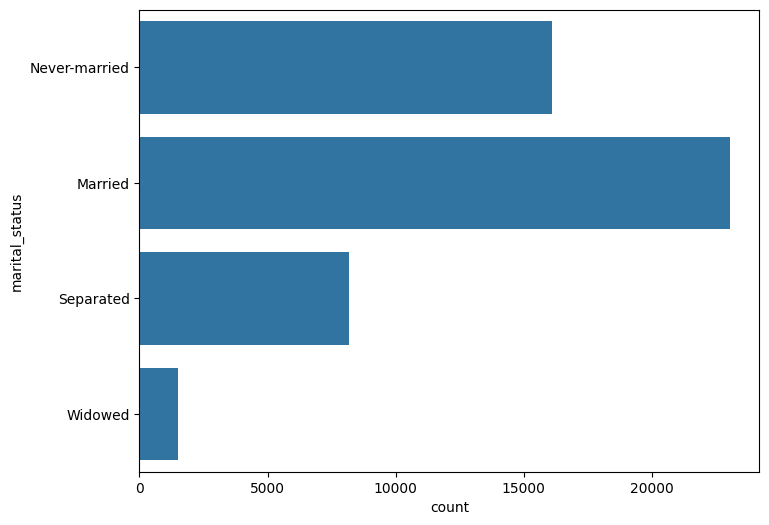

In [ ]:
sns.countplot(census_df.marital_status)

<Axes: xlabel='count', ylabel='occupation'>

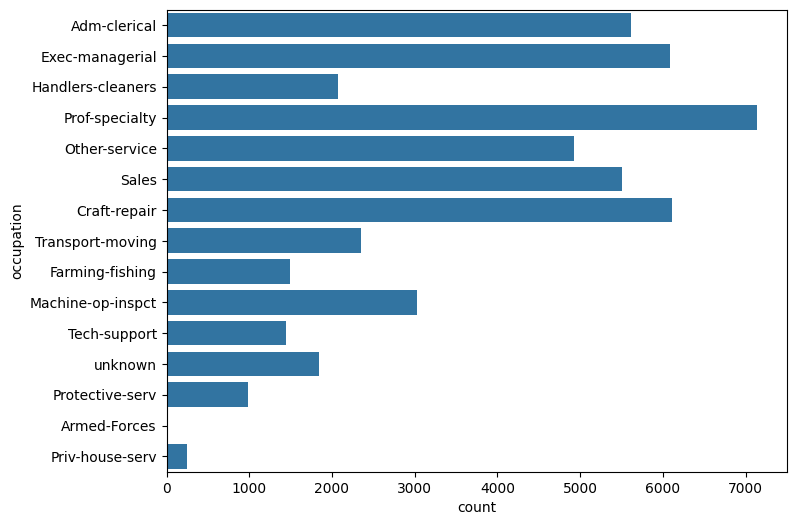

In [ ]:
sns.countplot(census_df.occupation)

<Axes: xlabel='count', ylabel='relationship'>

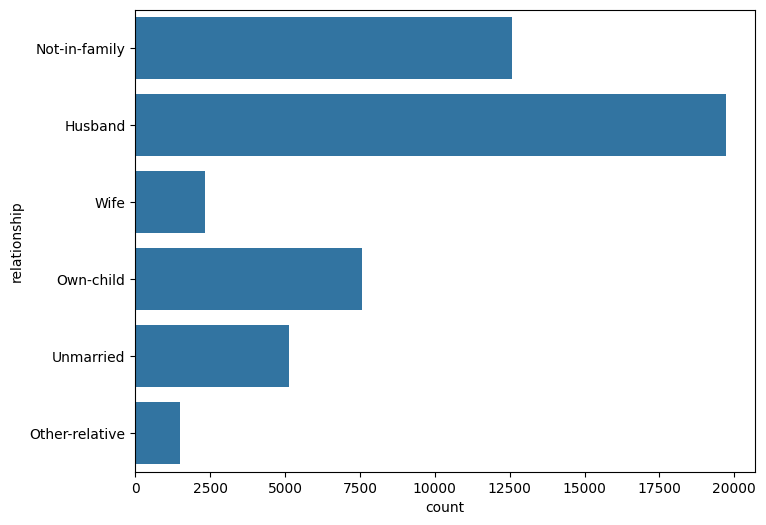

In [ ]:
sns.countplot(census_df.relationship)

<Axes: xlabel='count', ylabel='race'>

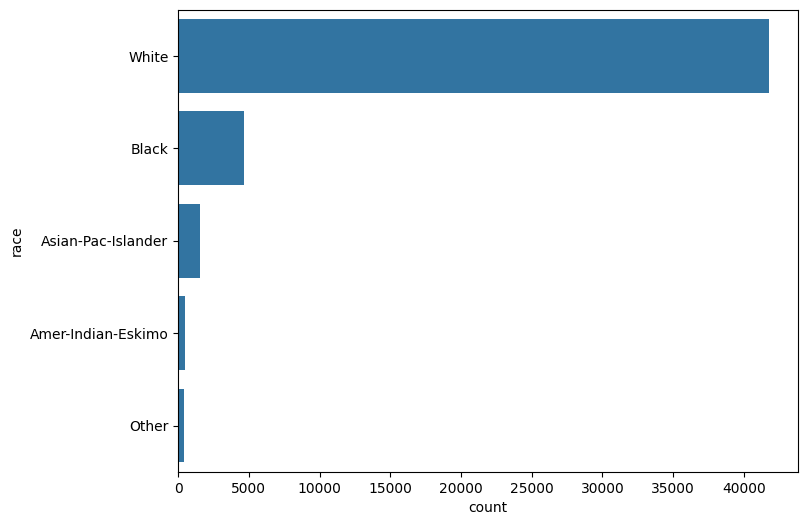

In [ ]:
sns.countplot(census_df.race)

<Axes: xlabel='count', ylabel='sex'>

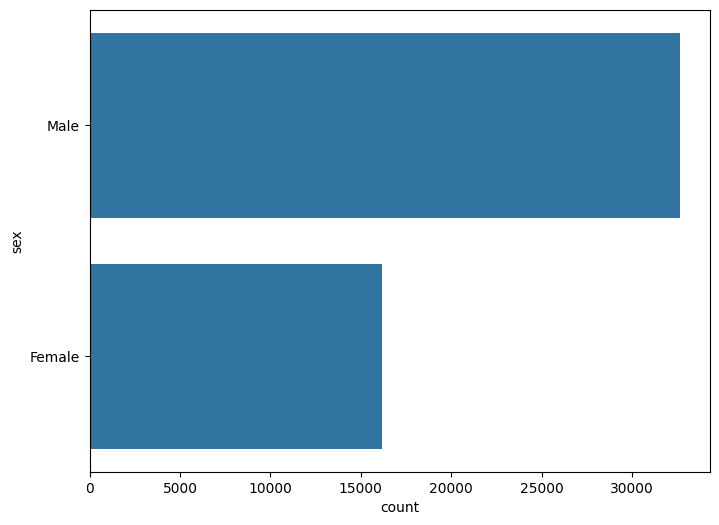

In [ ]:
sns.countplot(census_df.sex)


In [ ]:
census_df = census_df.rename(columns={'capital-gain': 'capital_gain'})
census_df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours-per-week,native-country,income
0,39,govt_employee,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,self_employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,HS-grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50k
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50k
48839,38,Private,374983,Bachelors,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
48840,44,Private,83891,Bachelors,13,Separated,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


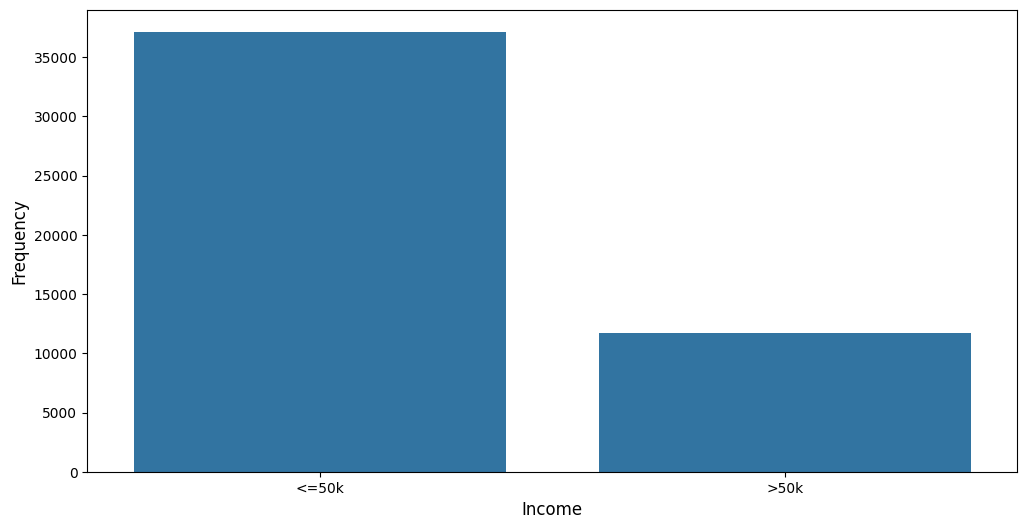

In [ ]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = census_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

* Our dataset has 35000 people earning <=50K i.e. 75% and remainng 30% earns more than 50K.

# Data  Visualization and  Analysis

 The followig

In [ ]:
census_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,govt_employee,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,self_employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,HS-grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50k
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50k
48839,38,Private,374983,Bachelors,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
48840,44,Private,83891,Bachelors,13,Separated,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


<ipython-input-38-ea806d25165e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=census_df, width=0.6, fliersize=3, linewidth=1.5, palette=['#9FC3D0', '#E9C7C6'])


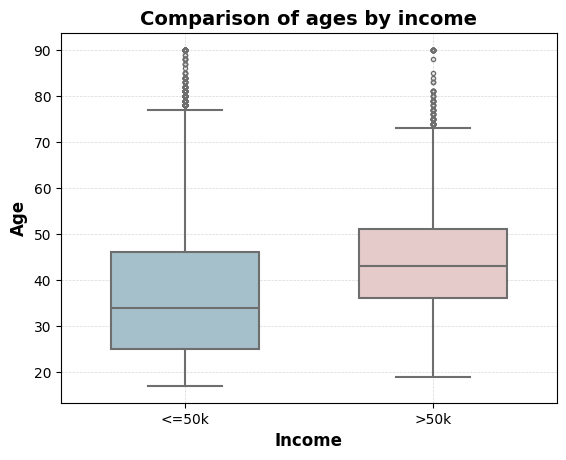

In [ ]:
sns.boxplot(x='income', y='age', data=census_df, width=0.6, fliersize=3, linewidth=1.5, palette=['#9FC3D0', '#E9C7C6'])
plt.title('Comparison of ages by income', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')
plt.rcParams['figure.figsize'] = (8, 6)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

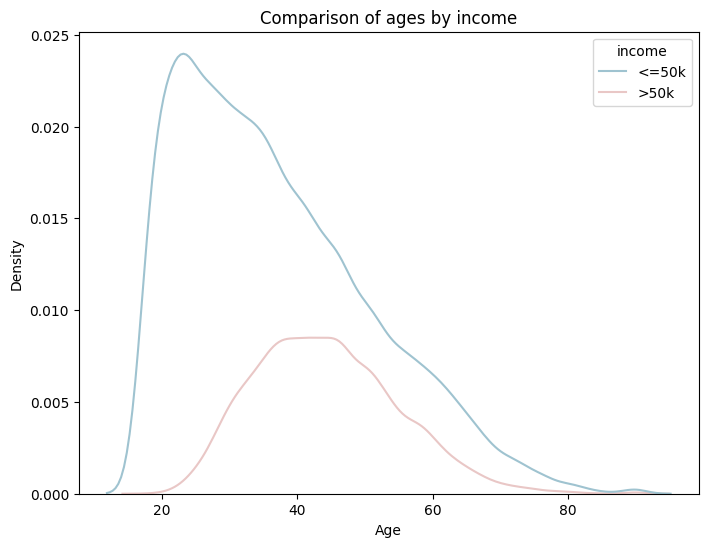

In [ ]:

sns.kdeplot(data=census_df, x='age', hue='income', palette=['#9FC3D0', '#E9C7C6'])
plt.title('Comparison of ages by income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
maledf = census_df[census_df['sex']=='Male']
maledf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,govt_employee,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,self_employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,HS-grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
7,52,self_employed,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50k
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50k
48839,38,Private,374983,Bachelors,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
48840,44,Private,83891,Bachelors,13,Separated,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


In [ ]:
fmaledf = census_df[census_df['sex']=='Female']
fmaledf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50k
6,49,Private,160187,HS-grad,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50k
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50k
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,50,govt_employee,139347,Masters,14,Married,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50k
48827,55,Private,224655,HS-grad,9,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,32,United-States,<=50k
48828,38,Private,247547,Assoc-voc,11,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50k
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50k


In [ ]:
above50df = census_df[census_df['income']=='>50k']
above50df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,self_employed,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50k
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50k
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50k
10,37,Private,280464,Some-college,10,Married,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50k
11,30,govt_employee,141297,Bachelors,13,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,38,Private,149347,Masters,14,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50k
48816,43,govt_employee,23157,Masters,14,Married,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50k
48822,40,Private,202168,Prof-school,15,Married,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50k
48826,50,govt_employee,139347,Masters,14,Married,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50k


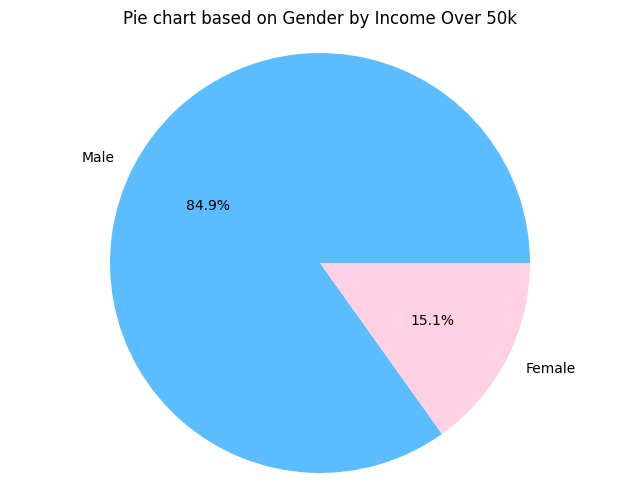

In [ ]:
# Create a pie chart of the number of cars by cyl
labels = above50df['sex'].value_counts().index
sizes = above50df['sex'].value_counts().values
colors = ['#5BBCFF', '#FFD1E3']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie chart based on Gender by Income Over 50k')
plt.show()

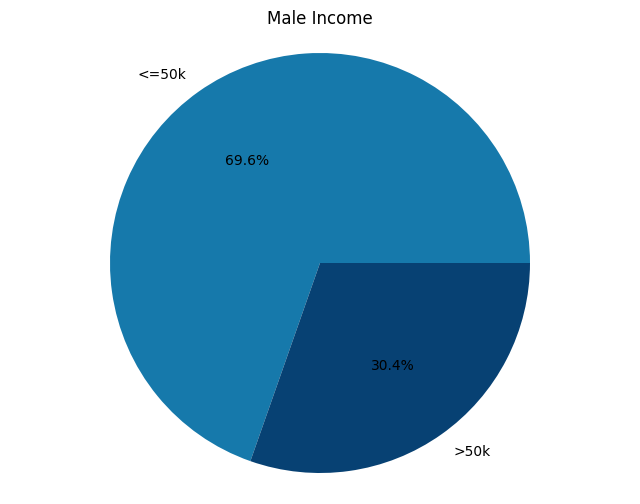

In [ ]:
labels = maledf['income'].value_counts().index
sizes = maledf['income'].value_counts().values
colors = ['#1679AB', '#074173']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Male Income')
plt.show()

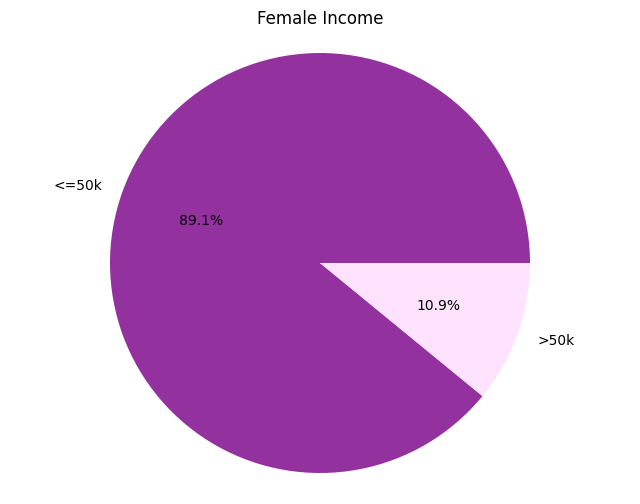

In [131]:
labels = fmaledf['income'].value_counts().index
sizes = fmaledf['income'].value_counts().values
colors = ['#93329E', '#FFE3FE']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Female Income')
plt.show()

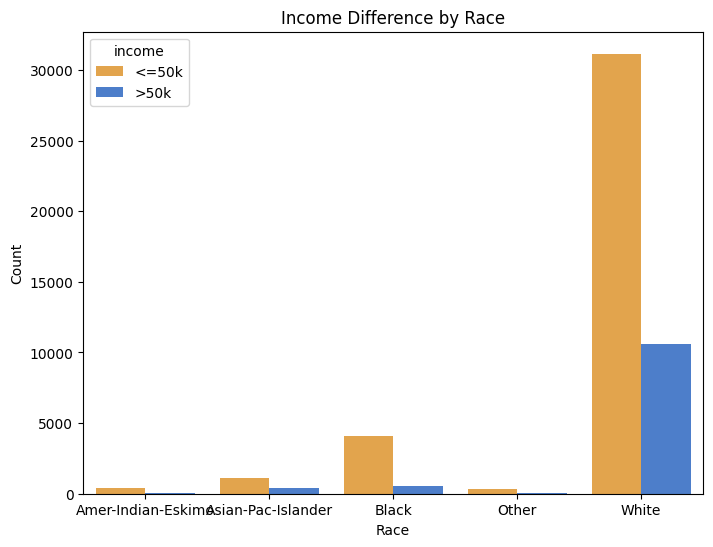

In [130]:
grouped_data = census_df.groupby(['income', 'race']).size().reset_index(name='counts')
sns.barplot(x='race', y='counts', hue='income', data=grouped_data, palette=['#FBA834', '#387ADF'])
plt.title('Income Difference by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

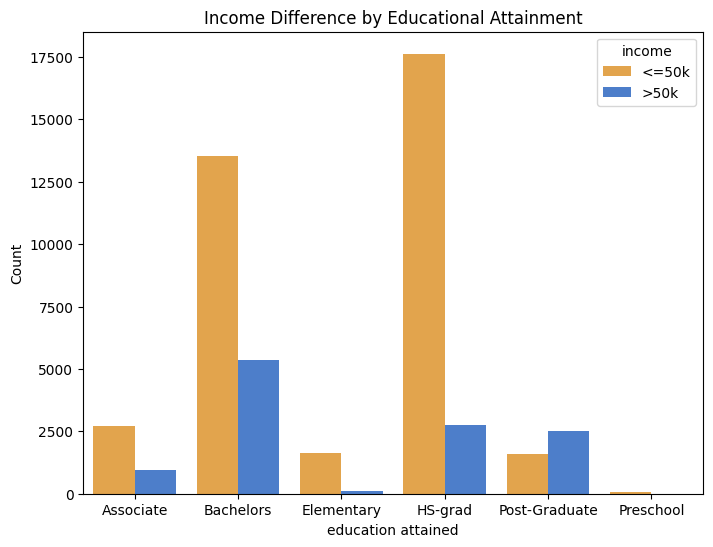

In [129]:
grouped_data = census_df.groupby(['income', 'education']).size().reset_index(name='counts')
sns.barplot(x='education', y='counts', hue='income', data=grouped_data, palette=['#FBA834', '#387ADF'])
plt.title('Income Difference by Educational Attainment')
plt.xlabel('education attained')
plt.ylabel('Count')
plt.show()

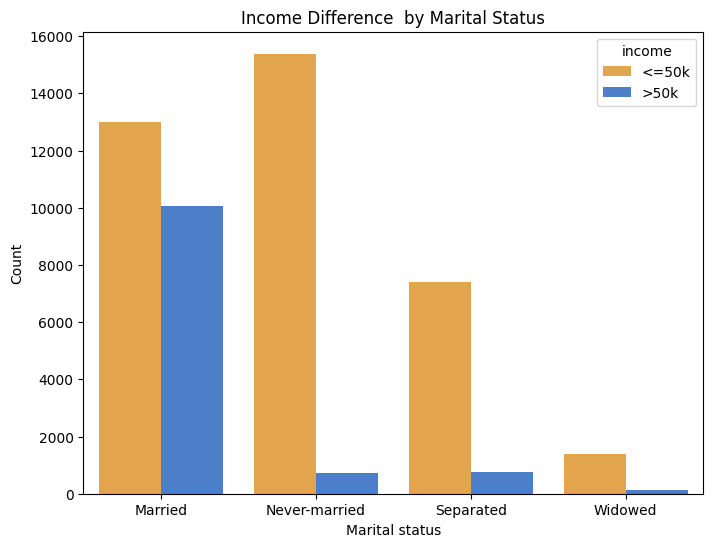

In [128]:

grouped_data = census_df.groupby(['income', 'marital_status']).size().reset_index(name='counts')
sns.barplot(x='marital_status', y='counts', hue='income', data=grouped_data, palette=['#FBA834', '#387ADF'])
plt.title('Income Difference  by Marital Status')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

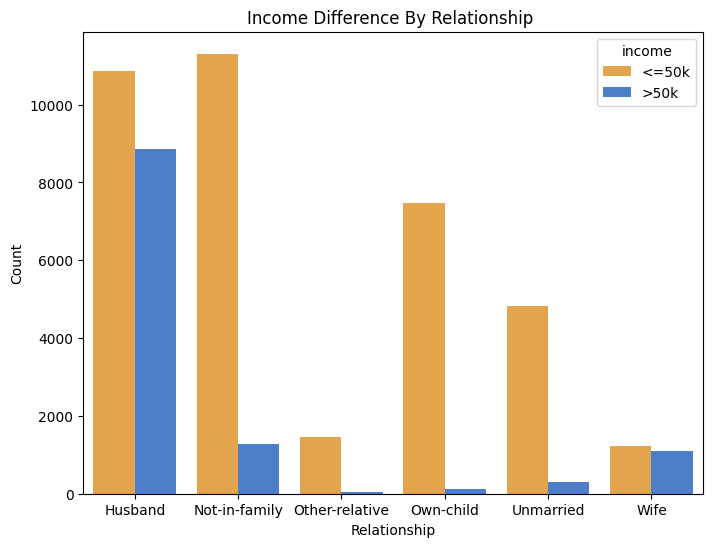

In [125]:
grouped_data = census_df.groupby(['income', 'relationship']).size().reset_index(name='counts')
sns.barplot(x='relationship', y='counts', hue='income', data=grouped_data, palette=['#FBA834', '#387ADF'])
plt.title('Income Difference By Relationship ')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()